# Инициализация

In [0]:
#@markdown - **Монтирование GoogleDrive** 
from google.colab import drive
drive.mount('GoogleDrive')

In [0]:
# #@markdown - **Размонтирование**
# !fusermount -u GoogleDrive

# Область кодов

In [0]:
#@title Метод k-средних { display-mode: "both" }
# В программе реализован метод k-средних для кластеризации стохастических данных
# coding: utf-8
import numpy as np
from scipy.cluster.vq import kmeans2
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from numpy.matlib import repmat

from mpl_toolkits.mplot3d import Axes3D

In [0]:
#@markdown - **Привязка данных**
class Bunch(dict):  
	def __init__(self,*args,**kwds):  
		super(Bunch,self).__init__(*args,**kwds)  
		self.__dict__ = self

In [0]:
#@markdown - **Генератор стохастических данных**
def generate_random(sigma, N, mu1=[15., 25., 10], mu2=[30., 40., 30], mu3=[25., 10., 20], mu4=[40., 30., 40]):  
	c = sigma.shape[-1]
	X = np.zeros((N, c))
	target = np.zeros((N,1))
	for i in range(N):  
		if np.random.random(1) < 0.25:
			X[i, :]  = np.random.multivariate_normal(mu1, sigma[0, :, :], 1)     # первая гауссовская модель  
			target[i] = 1
		elif 0.25 <= np.random.random(1) < 0.5:  
			X[i, :] = np.random.multivariate_normal(mu2, sigma[1, :, :], 1)      # вторая гауссовская модель
			target[i] = 2
		elif 0.5 <= np.random.random(1) < 0.75:  
			X[i, :] = np.random.multivariate_normal(mu3, sigma[2, :, :], 1)      # третья гауссовская модель
			target[i] = 3
		else:  
			X[i, :] = np.random.multivariate_normal(mu4, sigma[3, :, :], 1)      # четвертая гауссовская модель
			target[i] = 4
	return X, target

In [0]:
#@markdown - **Определения среднего значения и ковариационной матрицы каждой категории при использовании функции kmeans**
def cluster_kmeans(data, k):
	data = np.array(data)
	r, c = data.shape
	res, idx = kmeans2(data, k)
	sigma = np.zeros((k, c, c))
	for i in range(k):
		L = []
		for j in range(r):
			if idx[j] == i:
				L.append(data[j, :])
		xx = (np.array(L).flatten().reshape((-1, c))).T
		n = xx.shape[1]
		mu = np.mat(xx.mean(axis=1)).T
		xy = xx - repmat(mu, 1, n)
		sigma[i, :, :] = np.dot(xy, xy.T) / (n - 1)
		# sigma[i,:,:] = np.cov(xx) # прямой вызов встроенной функции в numpy для вычисления ковариационной матрицы
	return res, idx, sigma

In [0]:
#@markdown - **Стохастические данные**
k, N = 4, 400
sigma = np.zeros((k, 3, 3))
for i in range(k):
	sigma[i, :, :] = np.diag(np.random.randint(10, 25, size=(3, )))
sample, target = generate_random(sigma, N)
feature_names = ['x_label', 'y_label', 'z_label']
target_names = ['gaussian1', 'gaussian2', 'gaussian3', 'gaussian4']
data = Bunch(sample=sample, feature_names=feature_names, target=target, target_names=target_names)

In [0]:
#@markdown - **Определения среднего значения и ковариационной матрицы каждой категории**
mu,idx,sigma = cluster_kmeans(data.sample, k)

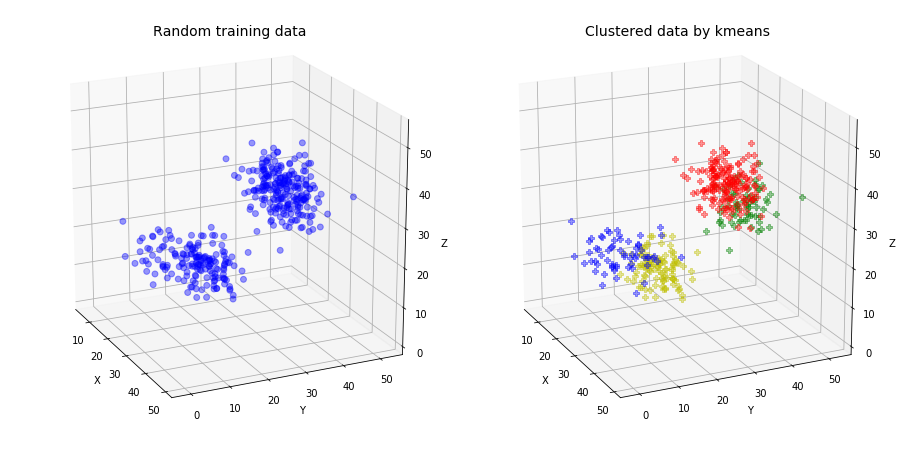

In [0]:
#@markdown - **Представление распределения обучающих данных и результата кластеризации**
titles = ['Random training data', 'Clustered data by kmeans']
DATA = [data.sample, data.sample]
color=['b','r','g','y']
fig = plt.figure(1, figsize=(16, 8))
fig.subplots_adjust(wspace=.01, hspace=.02)
for i, title, data_n in zip([1, 2], titles, DATA):
	ax = fig.add_subplot(1, 2, i, projection='3d')
	if title == 'Random training data':
		ax.scatter(data_n[:,0], data_n[:,1], data_n[:,2], c='b', s=35, alpha=0.4, marker='o')
	else:
		for j in range(N):
			ax.scatter(data_n[j, 0], data_n[j, 1], data_n[j, 2], c=color[idx[j]], s=35, alpha=0.4, marker='P')
	ax.set_xlabel('X')
	ax.set_ylabel('Y')
	ax.set_zlabel('Z')
	ax.view_init(elev=20., azim=-25)
	ax.set_title(title, fontsize=14)
plt.show()